## Problem Definition

Fader and Lodish collected data from the IRl Marketing Factbook on 10 variables for 331 different grocery product categories during the 1986 calendar year (DATA: factbook.csv). The five variables captured what Fader and Lodish called the “structural characteristics” of the category (i.e. aspects of the category unlikely to be changed substantially by short-term promotional activity). These variables are described below:
 
PENET:    Percentage of households making at least one category purchase
PCYCLE:  Average interpurchase time
PRICE:     Average dollars spent in the category per purchase occasion
PVTSH:    Combined market share for all private label and generic products
PUR/HH: Average number of purchase occasions per household during the year
 
In their examination of the structural characteristics of grocery product categories, Fader and Lodish conclude that “cluster configurations involving [the variables] PVTSH and PRICE were not very stable or meaningful.’’ This is your chance to further examine that statement on your own. Conduct a cluster analysis using the structural variables PENET, PURHH, PCYCLE, PRICE, and PVTSH and answer the following questions:
 
1. If you had to separate these categories into clusters on the basis of their structural characteristics, 1) how many clusters and 2) which clustering method would you choose? Explain the reasons for your recommendation.
 
2. Describe the differences between or among the clusters of your proposed solution.
 
3. Do you agree with Fader and Lodish that the results from the cluster analysis are neither stable nor meaningful? Why or why not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("factbook.csv")
data.head()

,ITEM,PENET,PCYCLE,PRICE,PVTSH,PUR/HH
0,BEER,62.3,11.1,46,5.16,0.4
1,WINE,42.9,5.8,59,4.58,1.0
2,FRESH_BRE,98.6,26.6,21,1.30,39.4
3,CUPCAKES,27.4,2.5,60,1.11,3.5
4,MUFF/BAGE,56.0,5.9,59,1.24,32.6


In [3]:
data.shape

(331, 6)

In [4]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(data.drop('ITEM', axis = 1)), columns = data.columns[1:])
X.head()

,PENET,PCYCLE,PRICE,PVTSH,PUR/HH
0,0.805769,1.624422,-1.386729,3.000220,-0.770107
1,0.155176,0.361695,-0.805537,2.448582,-0.729364
2,2.023117,5.317305,-2.504406,-0.671029,1.878155
3,-0.364628,-0.424532,-0.760830,-0.851738,-0.559604
4,0.594494,0.385520,-0.805537,-0.728095,1.416406


In [5]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

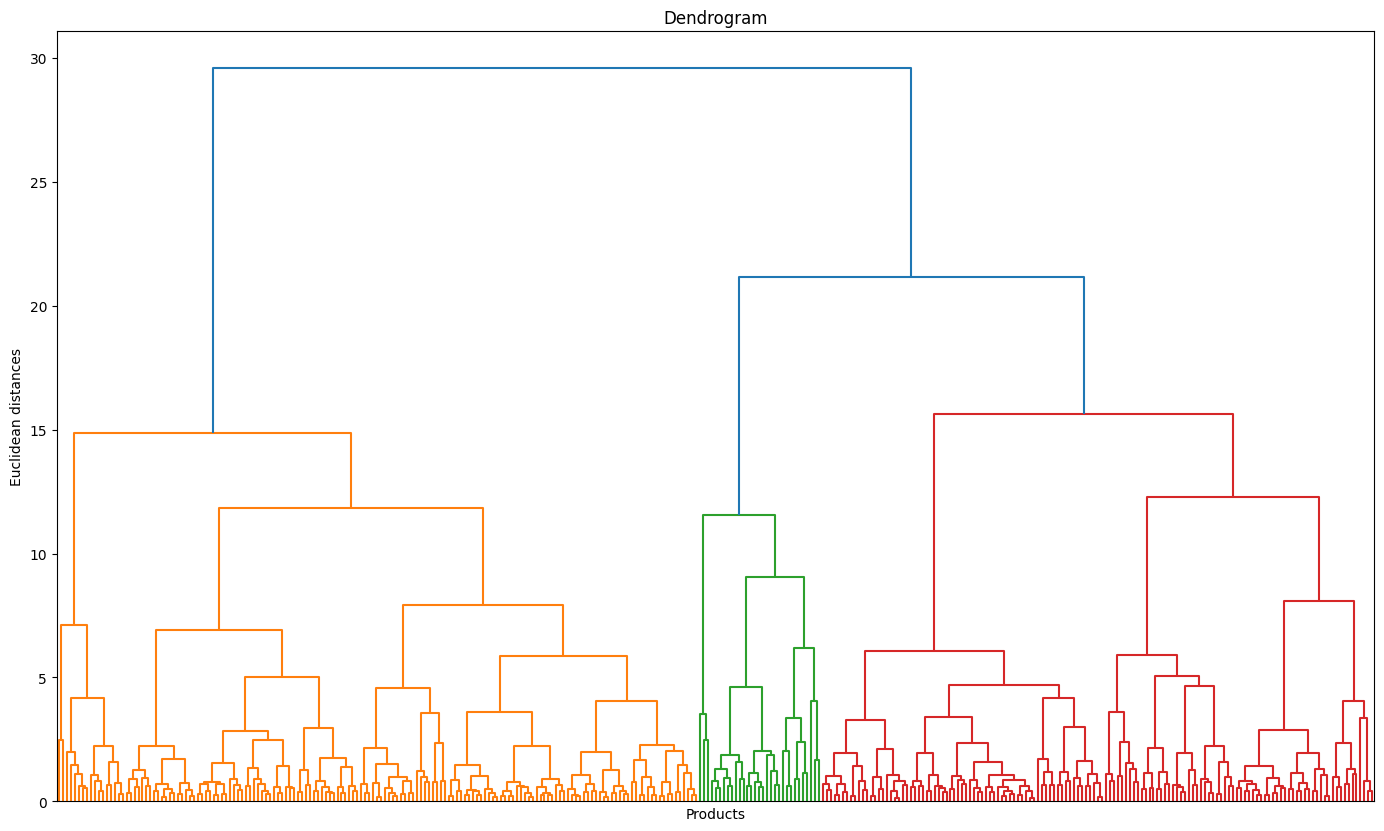

In [6]:
plt.figure(figsize=(17,10))
plt.title('Dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xticks([])
plt.show()

In [7]:
number_of_clusters = [i for i in range(2,6)]
silhouette_scores = []
for num in number_of_clusters:
  initial_centroids = []
  hc_model = AgglomerativeClustering(n_clusters = num, metric = 'euclidean', linkage = 'ward')
  hc = hc_model.fit(X)
  for cluster in range(0, num):
    cluster_mean = X.loc[hc.labels_ == cluster].mean().to_list()
    initial_centroids.append(cluster_mean)
  k_means_model = KMeans(n_clusters = num, init = initial_centroids, random_state = 0, n_init = "auto")
  labels = k_means_model.fit_predict(X)
  silhouette_sc = silhouette_score(X, labels)
  silhouette_scores.append(silhouette_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


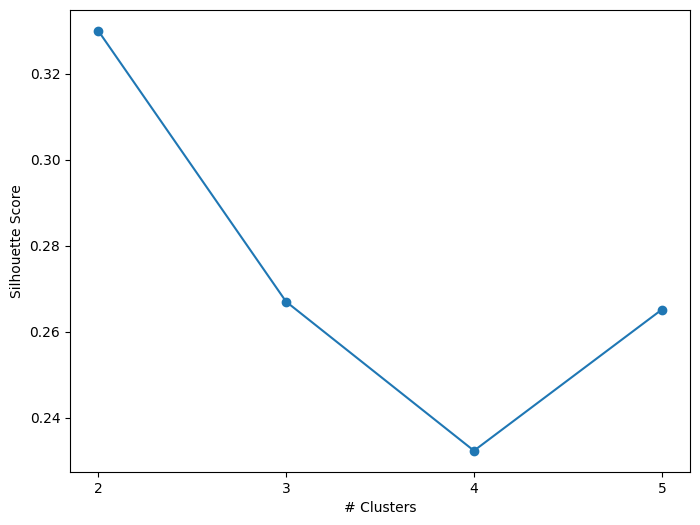

In [8]:
plt.figure(figsize = (8,6))
plt.plot([2,3,4,5], silhouette_scores)
plt.scatter([2,3,4,5], silhouette_scores)
plt.ylabel("Silhouette Score")
plt.xlabel("# Clusters")
plt.xticks([2,3,4,5])
plt.show()

## K-means with 2 Clusters (optimal)

In [9]:
hc_model = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
hc = hc_model.fit(X)
initial_centroids = []
for cluster in range(0, 2):
  cluster_mean = X.loc[hc.labels_ == cluster].mean().to_list()
  initial_centroids.append(cluster_mean)
k_means_model = KMeans(n_clusters = 2, init = initial_centroids, random_state = 0, n_init = "auto")
k_means_model.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=[[0.7442412561329389, 0.4504078104877428, -0.4263164128731431,
              -0.24655819964326, 0.5026164775837816],
             [-0.7858448046124197, -0.4755858868504118, 0.4501477651455547,
              0.2603409561450578, -0.5307130508648628]],
       n_clusters=2, n_init='auto', random_state=0)

In [10]:
labels = k_means_model.predict(X)

In [11]:
freq_table = pd.DataFrame([np.sum(labels == 0), np.sum(labels == 1)],
                          columns = ["Frequency"], index = ["Cluster 1", "Cluster 2"])
freq_table

,Frequency
Cluster 1,107
Cluster 2,224


In [12]:
cluster_means = pd.DataFrame(np.array([X.loc[labels == 0].mean().to_list(),
                              X.loc[labels == 1].mean()]).T,
                          columns = ["Cluster 1 (mean)", "Cluster 2 (mean)"],
                          index = X.columns)
cluster_means

,Cluster 1 (mean),Cluster 2 (mean)
PENET,1.173221,-0.560422
PCYCLE,0.853337,-0.407621
PRICE,-0.737015,0.352056
PVTSH,-0.228100,0.108959
PUR/HH,0.692878,-0.330973


In [13]:
R_squared = []
for col in range(len(X.columns)):
  tss = (X.iloc[:, col]**2).sum()
  wss = 0
  for cluster in range(0, k_means_model.n_clusters):
    cluster_means = k_means_model.cluster_centers_[cluster]
    wss_cluster = ((X.iloc[labels == cluster, col] - cluster_means[col])**2).sum()
    wss += wss_cluster
  r_squared = (tss - wss) / tss  
  R_squared.append(r_squared)


In [14]:
R_squared_table = pd.DataFrame(R_squared, columns = ["R_squared"], index = X.columns)
R_squared_table


,R_squared
PENET,0.657499
PCYCLE,0.347838
PRICE,0.259470
PVTSH,0.024854
PUR/HH,0.229324


We can say that the variable "PVTSH" is not useful in the construction of clusters.